## Step 1: Generate arrivals
Model a Poisson arrival process using i.i.d. exponential interarrival times with parameter λ

Produce a nondecreasing array of arrival times A1 , A2 , . . . , An

In [5]:
import numpy as np


# Set seeds for reproducibility
np.random.seed(2025)

def get_arrival_times (lmda,N) :
    """ Generate arrival times """
    
    # modeling
    interarrival_times = np.random.exponential(scale=lmda,size=N)

    # Arrays of arrival times
    # An = sum(interarrival_times where t <= n)
    arrival_times = np.cumsum(interarrival_times)

    # Sort the array to make it nondecreasing
    arrival_times.sort()
    
    return arrival_times


# Parameters
lmda = 1/5 # 5 arrivals over a fixed period of time so lambda = 1/5
N = 1000 # minimum number of arrivals to simulate


arrival_times = get_arrival_times(lmda=lmda,N=N)
print("Arrival times", arrival_times)

Arrival times [2.91180565e-02 4.66704697e-01 1.00614349e+00 1.12410577e+00
 1.22238736e+00 1.28195982e+00 1.49617923e+00 1.63187704e+00
 2.29805326e+00 2.62092775e+00 2.74239699e+00 3.06534547e+00
 3.07386810e+00 3.36733244e+00 3.36796767e+00 3.43725868e+00
 3.62604982e+00 4.11448223e+00 4.18585008e+00 4.24301315e+00
 4.46257094e+00 5.33950353e+00 5.46582757e+00 5.49214278e+00
 5.98760522e+00 6.57189178e+00 6.63695399e+00 6.78360359e+00
 6.81722697e+00 6.82017405e+00 6.89855845e+00 7.83842032e+00
 7.98237658e+00 8.40067235e+00 8.41462721e+00 8.48148518e+00
 8.60804590e+00 8.89495231e+00 9.40673645e+00 9.50658957e+00
 1.00358518e+01 1.01743261e+01 1.04982739e+01 1.09520655e+01
 1.10836714e+01 1.14603541e+01 1.15251346e+01 1.16083072e+01
 1.16305102e+01 1.17786199e+01 1.19877336e+01 1.24474753e+01
 1.24694083e+01 1.25441274e+01 1.25603918e+01 1.31160977e+01
 1.37553591e+01 1.37978103e+01 1.44137250e+01 1.45311397e+01
 1.45922884e+01 1.48139590e+01 1.49083660e+01 1.57546207e+01
 1.5974587

## Step 2: Generate service times
Draw i.i.d. service times S1 , S2 , . . . , Sn ∼ Exp(µ) (mean 1/µ).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set seeds for reproducibility
np.random.seed(2025)

def get_services_times (mu,N) :
    """ Generate service times """
    
    # modeling
    interservices_times = np.random.exponential(scale=1/mu,size=N)

    services_times = np.cumsum(interservices_times)
    
    return services_times

# Parameters
mu = 2 # over a fixed period of time, the service time is 2 units of time (second or minutes)
N = 1000 # minimum number of service times to simulate

services_times = get_services_times(mu=mu,N=N)

print("i.i.d service times", services_times)



## Step 3: Simulate the queue
Single server, FIFO. Let $D_i$ be the departure (service completion) time of job i.

Recurrence:
$servicestart_i = max(D_{i-1} , A_i )$, $D_i = servicestart_i + S_i $.

Per-job metrics: waiting time $W_i = servicestart_i − A_i$ ; systemtime $ T_i = D_i − A_i$ .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Set seeds for reproducibility
np.random.seed(2025)

def get_arrival_times (lmda,N) :
    """ Generate arrival times """
    
    # modeling
    interarrival_times = np.random.exponential(scale=1/lmda,size=N)

    # Arrays of arrival times
    # An = sum(interarrival_times where t <= n)
    arrival_times = np.cumsum(interarrival_times)

    # Sort the array to make it nondecreasing
    arrival_times.sort()
    
    return arrival_times
    
    
def get_services_times (mu,N) :
    """ Generate service times """
    
    # modeling
    interservices_times = np.random.exponential(scale=1/mu,size=N)

    services_times = np.cumsum(interservices_times)
    
    return services_times

    
def simulate_queue (lmda,mu,N) :
    """ Simulate a queue management FIFO """
    
    # modeling
    # i.i.d Arrival times
    arrival_times = get_arrival_times(lmda=lmda,N=N)

    # first service start time : We suppose service starts when the first process arrive
    first_service_start_time = arrival_times[0]

    # i.i.d service times
    service_times = get_services_times(mu=mu,N=N)
    
    # service start times and departure times
    service_start_times = [0] * N # array of N cases (each containing 0) to avoid out of range index when assigning values
    departure_times = [0] * N
    for i in range(N) :
        if i == 0 : 
            # first service start time
            service_start_times[i] = first_service_start_time
        else :
            # service start time (i) = max between departure time (i-1) and  arrival time (i)
            service_start_times[i] = max(departure_times[i-1],arrival_times[i])
            
        # departure time (i) = service start time (i) + service time (i)
        departure_times[i] = service_start_times[i] + service_times[i]

    # waiting times and system times
    waiting_times = [0] * N
    system_times = [0] * N
    for i in range(N) :
        # waiting time (i) = service start time (i) - arrival time (i)
        waiting_times[i] = service_start_times[i] - arrival_times[i]
        
        # system time (i) = departure time (i) - arrival time (i)
        system_times[i] = departure_times[i] - arrival_times[i]
        
        
    return {
        'arrival times' : arrival_times,
        'service times' : service_times,
        'waiting times' : waiting_times,
        'system times' : system_times,
        'departure times' : departure_times,
        'service start times' : service_start_times,
    }

# Initial parameters
lmda = 5 # 5 arrivals over 2s
mu = 3 # 3 number service times over 2s
N = N # minimum number of arrivals to simulate

data = simulate_queue(lmda=lmda,mu=mu,N=N)
arrival_times = data['arrival times']
service_times = data['service times']
waiting_times = data['waiting times']
system_times = data['system times']
departure_times = data['departure times']
service_start_times = data['service_start_times']

# Print values
for i in range(N) :
   print(f"\n\nProcess n°{i+1} : Arrives at {arrival_times[i]}s, wait for {waiting_times[i]}s, start at {service_start_times[i]} and leaves at {departure_times[i]}s")
   print(f"System time : {system_times[i]}s vs Normal service time : {service_times[i]}")


## Step4: Performance metrics and design analysis
Report. 

$\bar{W} = \frac{1}{N}  \sum_{i=1}^{N} W_i$, $\bar{T} = \frac{1}{N}  \sum_{i=1}^{N} T_i$

utilization $\rho \approx \frac{busy time of server}{simulation horizon}$, $\bar{L}_q$ (time-average queue length)

Experiment grid: Run at least the following parameter settings (in jobs/min):
(λ, µ) ∈ {(0.5, 1.0), (0.7, 1.0), (0.9, 1.0), (0.95, 1.0)} (so ρ = λ/µ ∈ {0.5, 0.7, 0.9, 0.95}).
Keep N fixed across settings (e.g., N = 2000) to make results comparable.

Figure 1: plot $\bar{W}$ versus $\rho$; Figure 2: plot $\bar{T}$ versus $\rho$.

Table 1: a summary table with columns (λ, µ, $\rho$, $\bar{W}$ , $\bar{T}$ , $\bar{L}_q$ , utilization).

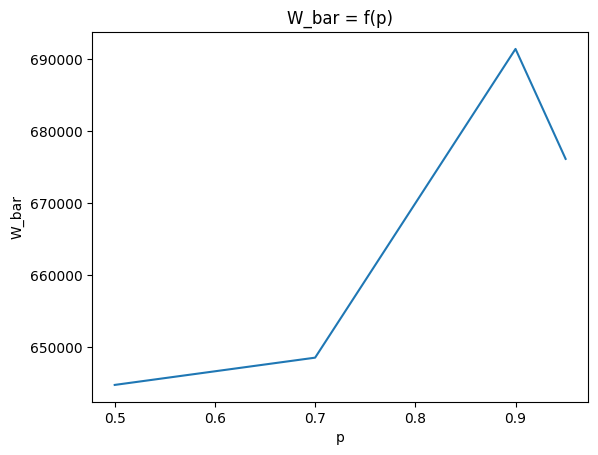

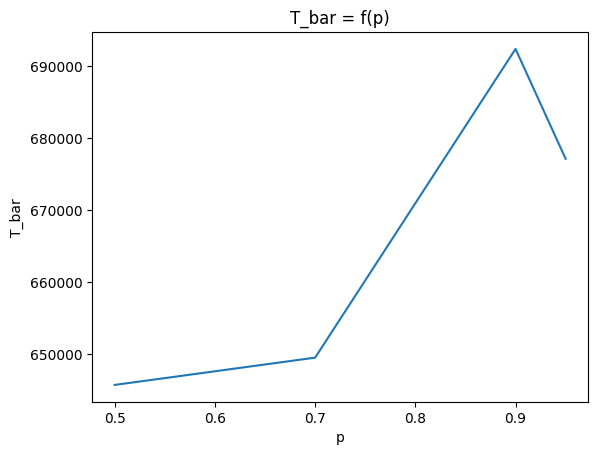

      λ    µ          W_bar          T_bar      Lq_bar     p
0  0.50  1.0  644760.163844  645738.454551  660.065455  0.50
1  0.70  1.0  648542.534082  649525.429220  660.828713  0.70
2  0.90  1.0  691374.383726  692390.788411  681.215165  0.90
3  0.95  1.0  676117.157110  677136.434167  664.330063  0.95


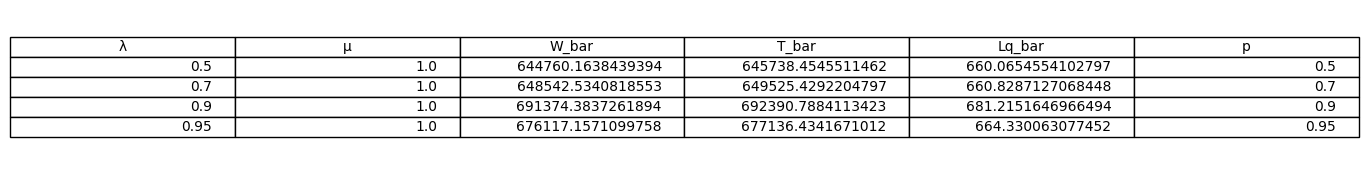

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # just to print a dataFrame of the metrics

# Set seeds for reproducibility
np.random.seed(2025)


def get_arrival_times (lmda,N) :
    """ Generate arrival times """
    
    # modeling
    interarrival_times = np.random.exponential(scale=1/lmda,size=N)

    # Arrays of arrival times
    # An = sum(interarrival_times where t <= n)
    arrival_times = np.cumsum(interarrival_times)

    # Sort the array to make it nondecreasing
    arrival_times.sort()
    
    return arrival_times
    
    
def get_services_times (mu,N) :
    """ Generate service times """
    
    # modeling
    interservices_times = np.random.exponential(scale=1/mu,size=N)

    services_times = np.cumsum(interservices_times)
    
    return services_times

    
def simulate_queue (lmda,mu,N) :
    """ Simulate a queue management FIFO """
    
    # modeling
    # i.i.d Arrival times
    arrival_times = get_arrival_times(lmda=lmda,N=N)

    # first service start time : We suppose service starts when the first process arrive
    first_service_start_time = arrival_times[0]

    # i.i.d service times
    service_times = get_services_times(mu=mu,N=N)
    
    # service start times and departure times
    service_start_times = [0] * N # array of N cases (each containing 0) to avoid out of range index when assigning values
    departure_times = [0] * N
    for i in range(N) :
        if i == 0 : 
            # first service start time
            service_start_times[i] = first_service_start_time
        else :
            # service start time (i) = max between departure time (i-1) and  arrival time (i)
            service_start_times[i] = max(departure_times[i-1],arrival_times[i])
            
        # departure time (i) = service start time (i) + service time (i)
        departure_times[i] = service_start_times[i] + service_times[i]

    # waiting times and system times
    waiting_times = [0] * N
    system_times = [0] * N
    for i in range(N) :
        # waiting time (i) = service start time (i) - arrival time (i)
        waiting_times[i] = service_start_times[i] - arrival_times[i]
        
        # system time (i) = departure time (i) - arrival time (i)
        system_times[i] = departure_times[i] - arrival_times[i]
        
        
    return {
        'arrival times' : arrival_times,
        'service times' : service_times,
        'waiting times' : waiting_times,
        'system times' : system_times,
        'departure times' : departure_times,
        'service start times' : service_start_times,
    }

def calculate_time_average_queue_length(arrival_times, departure_times):
    """ Compute the time_average_queue_length """
    
    # Register arrivals and departures with the format (time, type)
    events = []
    for t in arrival_times:
        events.append((t, "arrival"))
    for dt in departure_times:
        events.append((dt, "departure"))

    # Sort events by time
    events.sort(key=lambda x: x[0])

    # Iterate over events
    last_time = events[0][0]
    queue_length = 0
    area = 0.0

    for time, eventType in events:
        duration = time - last_time
        area += queue_length * duration   # add weighted time
        last_time = time # last time becomes the current time

        if eventType == "arrival":
            queue_length += 1 # increment the queue if it was arrival
        elif eventType == "departure":
            queue_length -= 1 # decrement the queue if it was departure

    # total time is the last event time - the first event time
    total_time = events[-1][0] - events[0][0]
    return area / total_time


def fifo_queue_performance(lmda,mu,N) :
    
    '''Simulate a queue management FIFO and return a tuple of the performance metrics :
    average waiting time, average system time, time-average queue length and utilization.
    '''

    data = simulate_queue(lmda=lmda,mu=mu,N=N)
    arrival_times = data['arrival times']
    service_times = data['service times']
    waiting_times = data['waiting times']
    system_times = data['system times']
    departure_times = data['departure times']
    service_start_times = data['service start times']
        
    #  waiting times mean
    wt_mean = np.mean(waiting_times)
    #  system times mean
    st_mean = np.mean(system_times)
    # time-average queue length = average arrival rate * average waiting time
    time_average_queue_length = calculate_time_average_queue_length(arrival_times,departure_times)
    # utilization = average arrival rate / average service time
    utilization = lmda / mu

    return {
        'average_waiting_time' : wt_mean,
        'average_system_time' : st_mean,
        'time_average_queue_length' : time_average_queue_length,
        'utilization' : utilization,
    }
    
# Initial parameters
N = 2000
lmda_mu = [(0.5, 1.0), (0.7, 1.0), (0.9, 1.0), (0.95, 1.0)]

summary_table = []
for lmda,mu in lmda_mu :
    metrics = fifo_queue_performance(lmda,mu,N)
    summary_table.append({
    'λ': lmda,
    'µ': mu,
    'W_bar': metrics['average_waiting_time'],
    'T_bar': metrics['average_system_time'],
    'Lq_bar': metrics['time_average_queue_length'],
    'p':  metrics['utilization']
    })


df = pd.DataFrame(summary_table)
p = df.get('p')
W_bar = df.get('W_bar')
T_bar = df.get('T_bar')

# plot W_bar = f(p)
plt.figure()
plt.plot(p,W_bar)
plt.title('W_bar = f(p)')
plt.xlabel('p')
plt.ylabel('W_bar')
plt.show()

# plot T_bar = f(p)
plt.figure()
plt.plot(p,T_bar)
plt.title('T_bar = f(p)')
plt.xlabel('p')
plt.ylabel('T_bar')
plt.show()

df = pd.DataFrame(summary_table)
print(df)

# Plot table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # remove axis

# Convert DataFrame to matplotlib table
table = ax.table(
    cellText=df.values,       # table values
    colLabels=df.columns,     # column headers
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.9, 1.2)

plt.show()
    


## Step5: Effect of wrong modeling

    • Keep µ fixed; keep the mean interarrival time equal to 1/λ but replace exponential interarrivals by uniform interarrivals on [0, 2/λ] (same mean, different variability).
    
    • Re-run the experiment grid and compare metrics to the Poisson/exponential baseline:
    
– Figure 3: $\bar{W}_q$ vs. ρ for (i) exponential interarrivals, (ii) uniform interarrivals.

– Figure 4:  $\bar{L}_q$ vs. ρ for both models.

    • Short discussion (5–7 sentences): Explain how reduced arrival variability affects waiting/queue lengths and why the wrong assumption can mislead system design near high utilization.

      λ    µ          W_bar  W_bar_uniform          T_bar      Lq_bar  \
0  0.50  1.0  644800.952551  647979.051798  645779.243259  660.107989   
1  0.70  1.0  691071.440815  675749.578554  692087.845500  680.916928   
2  0.90  1.0  667091.260424  658303.787608  668093.578444  666.548223   
3  0.95  1.0  659751.616485  665464.110224  660739.136909  669.088796   

   Lq_bar_uniform     p  
0      660.255153  0.50  
1      663.969252  0.70  
2      663.708461  0.90  
3      666.614059  0.95  


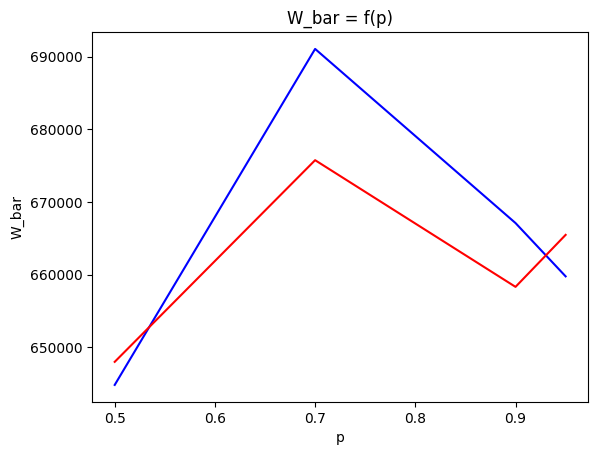

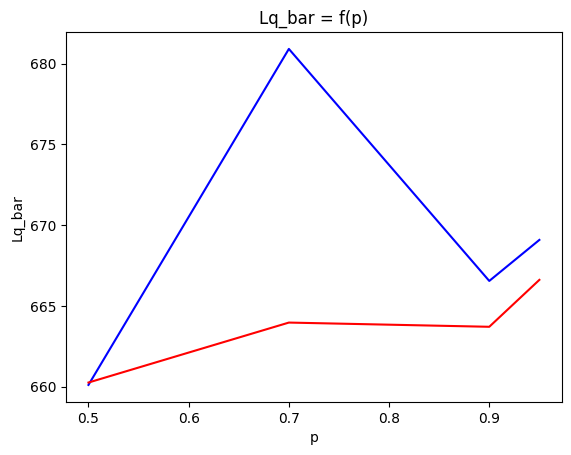

      λ    µ          W_bar  W_bar_uniform          T_bar      Lq_bar  \
0  0.50  1.0  644800.952551  647979.051798  645779.243259  660.107989   
1  0.70  1.0  691071.440815  675749.578554  692087.845500  680.916928   
2  0.90  1.0  667091.260424  658303.787608  668093.578444  666.548223   
3  0.95  1.0  659751.616485  665464.110224  660739.136909  669.088796   

   Lq_bar_uniform     p  
0      660.255153  0.50  
1      663.969252  0.70  
2      663.708461  0.90  
3      666.614059  0.95  


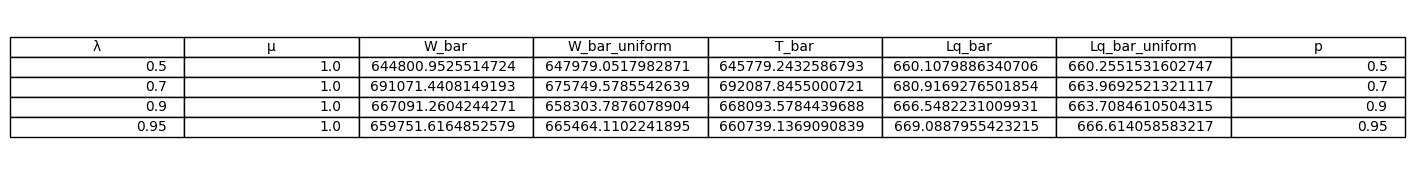

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # just to print a dataFrame of the metrics

# Set seeds for reproducibility
np.random.seed(2025)


def get_arrival_times (lmda,N,isuniform=False) :
    """ Generate arrival times """

    if isuniform :
        interarrival_times = np.random.exponential(scale=1/lmda,size=N)
    else :
        # modeling with uniform now between [0, 2/λ]
        interarrival_times = np.random.uniform(low=0,high=2/lmda,size=N)

    # Arrays of arrival times
    # An = sum(interarrival_times where t <= n)
    arrival_times = np.cumsum(interarrival_times)

    # Sort the array to make it nondecreasing
    arrival_times.sort()
    
    return arrival_times
    
    
def get_services_times (mu,N) :
    """ Generate service times """
    
    # modeling
    interservices_times = np.random.exponential(scale=1/mu,size=N)

    services_times = np.cumsum(interservices_times)
    
    return services_times

    
def simulate_queue (lmda,mu,N,isuniform=False) :
    """ Simulate a queue management FIFO """
    
    # modeling
    # i.i.d Arrival times
    arrival_times = get_arrival_times(lmda=lmda,N=N,isuniform=isuniform)

    # first service start time : We suppose service starts when the first process arrive
    first_service_start_time = arrival_times[0]

    # i.i.d service times
    service_times = get_services_times(mu=mu,N=N)
    
    # service start times and departure times
    service_start_times = [0] * N # array of N cases (each containing 0) to avoid out of range index when assigning values
    departure_times = [0] * N
    for i in range(N) :
        if i == 0 : 
            # first service start time
            service_start_times[i] = first_service_start_time
        else :
            # service start time (i) = max between departure time (i-1) and  arrival time (i)
            service_start_times[i] = max(departure_times[i-1],arrival_times[i])
            
        # departure time (i) = service start time (i) + service time (i)
        departure_times[i] = service_start_times[i] + service_times[i]

    # waiting times and system times
    waiting_times = [0] * N
    system_times = [0] * N
    for i in range(N) :
        # waiting time (i) = service start time (i) - arrival time (i)
        waiting_times[i] = service_start_times[i] - arrival_times[i]
        
        # system time (i) = departure time (i) - arrival time (i)
        system_times[i] = departure_times[i] - arrival_times[i]
        
        
    return {
        'arrival times' : arrival_times,
        'service times' : service_times,
        'waiting times' : waiting_times,
        'system times' : system_times,
        'departure times' : departure_times,
        'service start times' : service_start_times,
    }

def calculate_time_average_queue_length(arrival_times, departure_times):
    """ Compute the time_average_queue_length """
    
    # Register arrivals and departures with the format (time, type)
    events = []
    for t in arrival_times:
        events.append((t, "arrival"))
    for dt in departure_times:
        events.append((dt, "departure"))

    # Sort events by time
    events.sort(key=lambda x: x[0])

    # Iterate over events
    last_time = events[0][0]
    queue_length = 0
    area = 0.0

    for time, eventType in events:
        duration = time - last_time
        area += queue_length * duration   # add weighted time
        last_time = time # last time becomes the current time

        if eventType == "arrival":
            queue_length += 1 # increment the queue if it was arrival
        elif eventType == "departure":
            queue_length -= 1 # decrement the queue if it was departure

    # total time is the last event time - the first event time
    total_time = events[-1][0] - events[0][0]
    return area / total_time


def fifo_queue_performance(lmda,mu,N,isuniform=False) :
    
    '''Simulate a queue management FIFO and return a tuple of the performance metrics :
    average waiting time, average system time, time-average queue length and utilization.
    '''

    data = simulate_queue(lmda=lmda,mu=mu,N=N,isuniform=isuniform)
    arrival_times = data['arrival times']
    service_times = data['service times']
    waiting_times = data['waiting times']
    system_times = data['system times']
    departure_times = data['departure times']
    service_start_times = data['service start times']
        
    #  waiting times mean
    wt_mean = np.mean(waiting_times)
    #  system times mean
    st_mean = np.mean(system_times)
    # time-average queue length = average arrival rate * average waiting time
    time_average_queue_length = calculate_time_average_queue_length(arrival_times,departure_times)
    # utilization = average arrival rate / average service time
    utilization = lmda / mu

    return {
        'average_waiting_time' : wt_mean,
        'average_system_time' : st_mean,
        'time_average_queue_length' : time_average_queue_length,
        'utilization' : utilization,
    }
    
# Initial parameters
N = 2000
lmda_mu = [(0.5, 1.0), (0.7, 1.0), (0.9, 1.0), (0.95, 1.0)]

summary_table = []
for lmda,mu in lmda_mu :
    metrics = fifo_queue_performance(lmda,mu,N)
    # uniform modeling
    uniform_metrics = fifo_queue_performance(lmda,mu,N,True)
    summary_table.append({
    'λ': lmda,
    'µ': mu,
    'W_bar': metrics['average_waiting_time'],
    'W_bar_uniform': uniform_metrics['average_waiting_time'],
    'T_bar': metrics['average_system_time'],
    'Lq_bar': metrics['time_average_queue_length'],
    'Lq_bar_uniform': uniform_metrics['time_average_queue_length'],
    'p':  metrics['utilization']
    })


df = pd.DataFrame(summary_table)
print(df)

p = df.get('p')
W_bar = df.get('W_bar')
Lq_bar = df.get('Lq_bar')
W_bar_uniform = df.get('W_bar_uniform')
Lq_bar_uniform = df.get('Lq_bar_uniform')

# plot W_bar = f(p) and uniform W_bar = f(p)
plt.figure()

# plot W_bar = f(p)
plt.plot(p,W_bar, color='blue', label='Exponential inter-arrival times')

# plot uniform W_bar = f(p)
plt.plot(p,W_bar_uniform, color='red', label='Uniform inter-arrival times')

plt.title('W_bar = f(p)')
plt.xlabel('p')
plt.ylabel('W_bar')
plt.show()


# plot Lq_bar = f(p) and uniform Lq_bar = f(p)
plt.figure()

# plot Lq_bar = f(p)
plt.plot(p,Lq_bar, color='blue', label='Exponential inter-arrival times')

# plot uniform Lq_bar = f(p)
plt.plot(p,Lq_bar_uniform, color='red', label='Uniform inter-arrival times')

plt.title('Lq_bar = f(p)')
plt.xlabel('p')
plt.ylabel('Lq_bar')
plt.show()

df = pd.DataFrame(summary_table)
print(df)

# Plot table
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # remove axis

# Convert DataFrame to matplotlib table
table = ax.table(
    cellText=df.values,       # table values
    colLabels=df.columns,     # column headers
    loc='center'
)

# Style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(3, 1.2)

plt.show()
    
